# Assignment 2

Due Mon, Feb 15, 9:30am, commited to your `phys248` repo on the Abacus GitLab server. 

All code that is required to solve the problems in the specified ways must be in the committed notebook. The notebook must execute on the Abacus server from start to finish when opened. Test this by restarting the kernel! If commands are executed on the terminal, still copy-paste them into a notebook cell and comment accordingly that the commands have been executed in the terminal. The grader must be able to reproduce your work. No late submission will be accepted. 

## Problem 1

1. Download the _Metaphysics, by Aristotle (350 BC)_ , `http://www.textfiles.com/etext/AUTHORS/ARISTOTLE/aristotle-metaphysics-77.txt` using the appropriate terminal command. 
2. How many lines contain the string `physic`?
3. How many characters are in all lines combined that contain the string `physic` and the string `thing`?
3. Create a file called `substance.txt` that contains all lines that contain the string `substance`.
4. Write a command that will print the 93rd line of the file `substance.txt`.
6. Write a combination of two commands, the first if which involves the `set` command to print the 3rd word in the 93rd line of the file `substance.txt`.

Do this problem first on the terminal command line. Once you figured out the correct sequence of commands copy paste them into a code cell below that starts with the `%%bash` magic command so that your grader can execute that one cell and get the answers in sequence for all

In [7]:
%%bash

# command for item 1
wget http://www.textfiles.com/etext/AUTHORS/ARISTOTLE/aristotle-metaphysics-77.txt
echo ""
echo "2 ***"
# write here command for item 2
grep "physic" aristotle-metaphysics-77.txt | wc -l
echo ""
echo "3 ***"
# write here command for item 3
grep "physic" aristotle-metaphysics-77.txt | grep "thing" | wc -l
echo ""
echo "4 ***"

grep "substance" aristotle-metaphysics-77.txt > substance.txt
echo ""
echo "5 ***"

head -93 substance.txt | tail -1 
echo ""
echo "6 ***"

#set is typically used to alter options for written bash scripts, not usually for single-line commands like this one?
#assuming typo, using 'sed'
sed '93p;d' substance.txt | awk '{print $3}'
# and so on ...


2 ***
39

3 ***
6

4 ***

5 ***
substance, or destructions or privations or qualities of substance, or

6 ***
destructions


## Problem 2

### 2.1
The [Gaussian function](https://en.wikipedia.org/wiki/Gaussian_function) is given by 
$$
f(x) = a e^{-\frac{(x-b)^2}{2c^2}}
$$

Write a code cell that calculates $f(x)$ represented by the variable `fv1` for the default parameter values `a=c=1` and `b=0` for $x \in [-3,5]$. Use an array `x` for $x$ that divides the range into 70 equal intervals. 

Use your code cell to create the following additional arrays:
* `fv2`: default parameters but $a=0.75$
* `fv3`: default parameters but $b=1.25$
* `fv4`: default parameters but $c=1.5$

Make a line plot of all four cases. Provide all elements required for a line plots, such as a legend for each line and axis labels. Use a different line style and color for each line. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def fvn(a,b,c,x):
    return a*np.e**(-(x-b)**2/(2*c**2))

x = np.linspace(-3, 5, 70)
a = 1; c = 1; b = 0

fv1 = fvn(a,b,c,x)
fv2 = fvn(.75,b,c,x)
fv3 = fvn(a, 1.25,c,x)
fv4 = fvn(a,b, 1.5,x)

plt.close(1); fig = plt.figure(1)
plt.plot(x, fv1, label='fv1')
plt.plot(x, fv2, '--', label='fv2')
plt.plot(x, fv3, '-.', label='fv3')
plt.plot(x, fv4, ':', label='fv4')
plt.legend()
plt.title('fvn(x) For Various Values of a,b,c')
plt.xlabel('x')
plt.ylabel('fvn(x),  n=1,2,3,4')
plt.show()

NameError: name 'close' is not defined

Briefly describe the meaning of each parameter (in this markdown cell):


a scales the function vertically.

b translates the function horizontally.

c scales the function horizontally.


### 2.2
Without using a loop
1. Find $x$ values `xmax1` and `xmax3` for which the arrays `fv1` and `fv3` have a maximum.
2. Find the $x$ values for which the values of array `fv3` are larger than `fv2` and smaller than `fv1`.

In [61]:
xmax1 = max(fv1)
xmax2 = max(fv3)

fv3_ind = [i for i,f in enumerate(fv3) if fv2[i]<f<fv1[i]]
x_vals = x[fv3_ind]
print('The x values are:', x_vals)

The x values are: [0.47826087 0.5942029 ]


### 2.3
Given is the function
$$ z(x,y) = x^4 \sin y$$
Use a $(x,y)$ grid of $40\times40$ equal rectangles with $x \in [1.5,3.7]$ and $y \in [-3.2,4.8]$.

1. Make a surface plot
2. Make an image of the $z$ array

In [1]:
%pylab ipympl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

Populating the interactive namespace from numpy and matplotlib


In [2]:
x = np.linspace(1.5, 3.7, 40)
y = np.linspace(-3.2, 4.8, 40)
xv, yv = np.meshgrid(x, y)
z = xv**4 * np.sin(yv)

#surface plot
close(2); fig = plt.figure(2)
ax = Axes3D(fig)
ax.plot_surface(xv,yv,z, rstride=1, cstride=1, cmap=cm.inferno)
plt.title('Surface Plot of z(x,y)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z(x,y)')
plt.show()

#z array image
plt.close(3); fig = plt.figure(3)
imshow(z, cmap=cm.inferno, interpolation='gaussian')
plt.title('Image of z(x,y) array')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

### 2.4
Create a plot of the two-dimensional Gaussian function
$$
h(x,y) = \exp{-(x^2 + y^2)}
$$
for $x \in [-1,1.2]$ and $y \in [-1,1.5]$ divided into a grid of $50\times50$ equal rectangles. 
Do both a 
1. 3D surface plot
2. Contour plot with labels

In [108]:
x = np.linspace(-1, 1.2, 50)
y = np.linspace(-1, 1.5, 50)
xv, yv = np.meshgrid(x,y)
h = np.exp(-(xv**2 + yv**2))

#surface plot
close(4); fig = plt.figure(4)
ax = Axes3D(fig)
ax.plot_surface(xv,yv,h, rstride=1, cstride=1, cmap=cm.inferno)
plt.title('Surface Plot of h(x,y)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('h(x,y)')
plt.show()

#contour plot
close(5); fig = plt.figure(5)
CS = plt.contour(xv, yv, h, 15, cmap=cm.inferno)
plt.clabel(CS, inline=1, fontsize=8)
plt.title("Contour plot of h(x,y)")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## Problem 3

Analyse wave dats from ocean buoy "Station 46132 - South Brooks". 
### 3.1

Find and clone the repo _Assignment2_P4_ from the Abacus GitLab server. Unzip the file `files.zip` and review the content, i.e. open the data file, and review the links in the Markdown file that point to the source of the data and the data description.

In [ ]:
%%bash
#cloning repo into home directory, then unzipping into current (phys248/exams-assignments/)

cd ~
git clone ssh://git@abacus.phys.uvic.ca:2233/fherwig/assignment2_p4.git
unzip -d ../phys248/Exam-Assignment-Quiz/ files.zip


# insert bash commands here after finding the right sequence on the terminal command line

### 3.2
1. Read the first 9 columns of the data file `46132.txt` and write them into variables `YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT`. You can either of the two methods of reading ASCII text files we have covered in class. 
2. Process the columns `YY,MM,DD,hh,mm` to create `datetime` objects and from those create a time stamp array. Link to [format codes](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes).

In [3]:
from datetime import datetime

YY = []; MM=[]; DD=[]; hh=[]; mm=[]; WDIR=[]; WSPD=[]; GST=[]; WVHT=[]
cols=[YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT]
for line in open('46132.txt', 'r'):
    l = line.split()
    for i, c in enumerate(cols):
        c.append(l[i])    
for c in cols:
    del c[0:2]
    
#2:
time_stamp = [datetime.strptime("{:s} {:s} {:s} {:s} {:s}".format(Y,M,D,h,m), "%Y %m %d %H %M") for (Y,M,D,h,m) in zip(YY,MM,DD,hh,mm)]

### 3.3
1. Make a plot of wave height vs. time in hours, where $t=0\mathrm{hr}$ corresponds to the time of the earliest date provided in the table. 
2. Make a plot of wind speed in units of knots as a function of time in hours. One nautical mile is $\mathrm{nm} = 1.852\mathrm{km}$ and a knot is $\mathrm{nm/hr}$.
3. Make plot of wind direction as a funtion of time

In [4]:
close(6); fig = plt.figure(6)
plt.plot(time_stamp, WVHT)
plt.title("1. Wave height vs Time")
plt.xlabel('time (mm-dd-h)')
plt.ylabel('Wave height (m)')
plt.show()

close(7); fig=plt.figure(7)
WSPD = np.array([float(i) for i in WSPD])
wspd_knot = WSPD*3.6/1.852
plt.plot(time_stamp, wspd_knot)
plt.title('2. Wind Speed vs Time')
plt.xlabel('time (mm-dd-h)')
plt.ylabel('wind speed (knots)')
plt.show()

close(8); fig=plt.figure(8)
plt.plot(time_stamp, WDIR)
plt.title('3. Wind Direction vs Time')
plt.xlabel('time (mm-dd-h)')
plt.ylabel('wind direction (degT)')
plt.show()


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

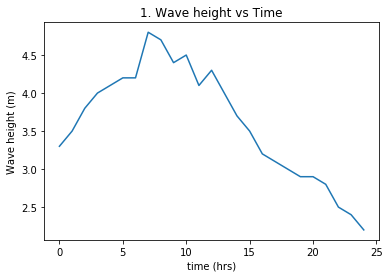

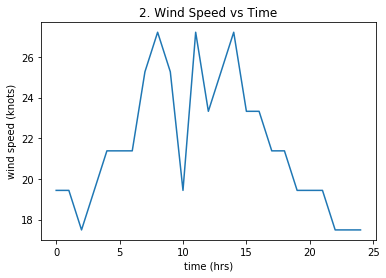

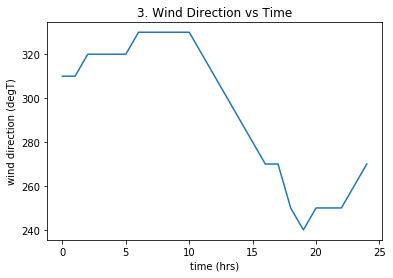

In [52]:
#good one:
#1: reverse to move back in time
timestamp = np.array(timestamp[::-1])
#subtract lowest and convert units
time_hrs = (timestamp - timestamp[0])/3600
#plot
plt.plot(time_hrs, WVHT)
plt.title("1. Wave height vs Time")
plt.xlabel('time (hrs)')
plt.ylabel('Wave height (m)')
plt.show()

#2
wspd_knot = WSPD*3.6/1.852
plt.plot(time_hrs, wspd_knot)
plt.title('2. Wind Speed vs Time')
plt.xlabel('time (hrs)')
plt.ylabel('wind speed (knots)')
plt.show()

#3
plt.plot(time_hrs, WDIR)
plt.title('3. Wind Direction vs Time')
plt.xlabel('time (hrs)')
plt.ylabel('wind direction (degT)')
plt.show()

### 3.4
Make a plot of wave height as a function of time in which the wind speed is encoded by the size of the symbol and the wind direction is encoded by color. 

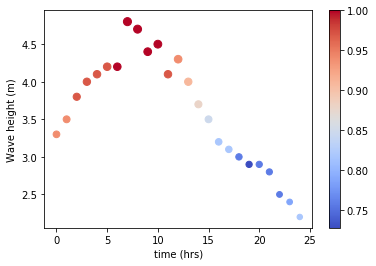

In [54]:
#good one:
fac=65; area=fac*WVHT/max(WVHT)
colours = WDIR/max(WDIR)


plt.scatter(time_hrs, WVHT, s=area, c=colours, cmap='coolwarm', marker='o')
plt.xlabel('time (hrs)')
plt.ylabel('Wave height (m)')
plt.colorbar()
plt.show()


In [5]:
close(9); fig = plt.figure(9)
WVHT = np.array([float(i) for i in WVHT])
fac=65; area=fac*WVHT/max(WVHT)
#get hours offset to get colours
colours = np.array(time_stamp)/max(time_stamp)


plt.scatter(time_stamp, WVHT, s=area, c=colours, cmap='inferno', marker='o')
plt.xlabel('time (mm-dd-h)')
plt.ylabel('Wave height (m)')
plt.show()


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

TypeError: unsupported operand type(s) for /: 'datetime.datetime' and 'datetime.datetime'

## Problem 4
The plots of wind speed and wave height from problem 3 suggest that there is a lag between the maximum wind speed and the maximum wave height, which is what we would expect. But there is quite a bit of fluctuation in the data that makes it difficult to determine the time lag quantitiatively. The goal of this problem is  to estimate the time lag by applying a filter to the data which consists of forming a moving average of a time bin size (filter width) that is just large enough to average out the fluctuations and small enough to determine the maxima of the average wind speed and wave height. 

While you could find helpful numpy or scipy methods that could do part or even all of this job, here you must only use techniques we have already learned in this class, i.e. you must code this _by hand_. Here are some steps to guide your solution:

1. Create bins in the time hour array. The number of bins should be specified in a variable `nbins`. Check your bin boundaries.
2. For each time bin  identify the wave height and wind speed values for the times in each bin. This can be done with a boolean index array. Make sure that the values associated with the first and last time value are included (depending on which side of each interval is open). In other words, make sure that both boundary time array values are included in the analysis. 
3. Calculate and store the value (wave height and wind speed) average for each bin.
4. You will need to also create a new time hours array that represents the mid-interval time for each bin.
5. Plot both the filtered wave height and wind speed as a function of the mid-interval times. Vary the number of bins and check the plots until you find the smallest `nbins` with only one peak. 
6. Adopt that bin size as your filter and calculate the time lag from the differene of the times at which the filtered wave height and wind speeds have their maximum.

In [ ]:
print('Time lag between max in wind speed and mas in wave height: {:4.1f}hr'.format(t_lag))